<h1><span style="color:orange">The ORANGE exercise</span></h1>

Patterns from each of ***two classes have been drawn from different distributions***. I.e. there is a true difference between them. However, a simple classification has been run, and the ***classifier has returned an accuracy quite close to chance***. 

***Is there a problem? Is there a simple way to improve the analysis to increase the classification score?***


## Getting ready

Import the packages we might need:

In [1]:
import numpy as np # This lets python process matrices, like Matlab
import matplotlib.pyplot as plt # This lets python plot graphs like Matlab

# scikit-learn is the major library for machine learning in Python:
import sklearn as skl
from sklearn import preprocessing # includes LabelEncoder, OneHotEncoder, StandardScaler...
from sklearn import model_selection # includes StratifiedKFold, LeaveOneGroupOut...
from sklearn import linear_model # includes LogisticRegression, RidgeClassifier...
from sklearn import svm # includes SVC, NuSVC & LinearSCV...
from sklearn import discriminant_analysis # includes LinearDiscriminantAnalysis
from sklearn import metrics # includes roc_auc_score...
from sklearn import pipeline # includes make_pipeline

Set the random number generator:

In [2]:
np.random.seed(1)

## Simulate some data with a true difference between conditions:

In [3]:
nvox = 2 # number of voxels
nruns= 6 # number of runs
n_samples_per_run = 20 # number of samples/patterns per run; these will be divided into conditions/classes "0" and "1"
proportion_of_samples_from_condition_0 = 0.9

mu0 = np.arange(nvox) # mean activation for condition 0 (voxels all have different activation strength)
mu1 = np.roll(mu0, 1) # mean activation for condition 1 (same overall activity, but distributed differently across voxels)
voxel_covariance0 = np.diag(mu0) + 1 # voxel covariance: independent noise per voxel is proportional to mean, plus some covariance
voxel_covariance1 = np.diag(mu1) + 1 # voxel covariance: independent noise per voxel is proportional to mean, plus some covariance

data_per_run = []   # list of pattern matrices (one for each run)
labels_per_run = []    # list of label vectors (one for each run)
for r in np.arange(nruns):
    # label each sample as condition 0 or 1 (the +0 is a trick to convert the logical values to integers):
    label_vector= ((np.arange(n_samples_per_run)/n_samples_per_run)>=proportion_of_samples_from_condition_0)+0;
    
    # sample activations from each distribution:
    data_matrix0 =  np.random.multivariate_normal(mu0, voxel_covariance0, size=np.sum(label_vector==0))
    data_matrix1 =  np.random.multivariate_normal(mu1, voxel_covariance1, size=np.sum(label_vector==1))
    data_matrix  =  np.concatenate((data_matrix0, data_matrix1))
    
    data_per_run.append( data_matrix ) 
    labels_per_run.append( label_vector ) 

# concatenate runs
data        = np.concatenate(data_per_run, axis=0)             
labels      = np.concatenate(labels_per_run, axis=0)
run_indices = np.concatenate([[i] * n_samples_per_run for i in range(nruns)])

\
Plot the data for the first two voxels:

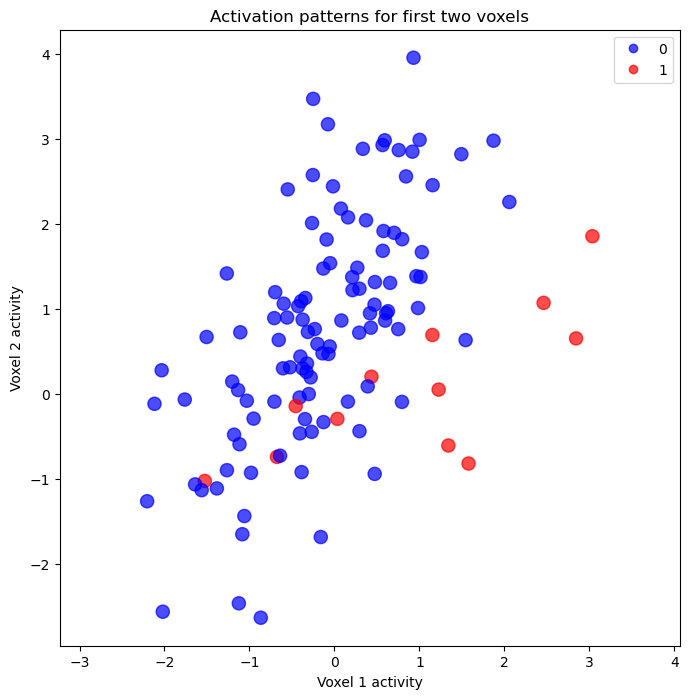

In [4]:
plt.figure(figsize=(8,8))  # create a matplotlib figure
plt.title('Activation patterns for first two voxels')
scatter = plt.scatter(data[:,[0]], data[:,[1]], 
                      s= 90, alpha=0.7, c=labels, cmap='bwr')
plt.legend(handles=scatter.legend_elements()[0], labels=set(np.unique(labels))) # "set" returns unique values
plt.xlabel('Voxel 1 activity')
plt.ylabel('Voxel 2 activity')
plt.rcParams.update({'font.size': 18})
plt.axis('equal')
plt.show()

\
Specify the pre-processing, classification pipeline, and a leave-one-run-out cross-validation scheme:

In [5]:
scaler = skl.preprocessing.MinMaxScaler()
SVM    = skl.svm.LinearSVC(dual=True)
pipe   = skl.pipeline.make_pipeline(scaler, SVM)
logo   = skl.model_selection.LeaveOneGroupOut()  

\
Run the classification analysis:

In [6]:
accuracy = skl.model_selection.cross_val_score(pipe, data, labels, groups  = run_indices, cv = logo, scoring = 'balanced_accuracy')

print("Accuracy per fold:", accuracy)
print("Mean accuracy for data with a true difference between conditions:", np.mean(accuracy))

Accuracy per fold: [0.5  0.5  0.5  0.5  0.5  0.75]
Mean accuracy for data with a true difference between conditions: 0.5416666666666666


The classifier has returned an accuracy quite close to chance. 

Is there a problem? Is there a simple way to improve the analysis to increase the classification score?